##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Addons 이미지: 연산

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/addons/tutorials/image_ops"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/addons/tutorials/image_ops.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png"> Google Colab에서 실행하기</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/addons/tutorials/image_ops.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서소스 보기</a></td>
      <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/addons/tutorials/image_ops.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드하기</a></td>
</table>

## 개요

이 노트북은 TensorFlow Addons에서 일부 이미지 연산을 사용하는 방법을 보여줍니다.

예제에서 다룰 이미지 연산의 목록은 다음과 같습니다.

- `tfa.image.mean_filter2d`

- `tfa.image.rotate`

- `tfa.image.transform`

- `tfa.image.random_hsv_in_yiq`

- `tfa.image.adjust_hsv_in_yiq`

- `tfa.image.dense_image_warp`

- `tfa.image.euclidean_dist_transform`

# 설정

In [2]:
!pip install -q -U tensorflow-addons

In [3]:
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

# 이미지 준비 및 검사

## 이미지 다운로드하기

In [4]:
img_path = tf.keras.utils.get_file('tensorflow.png','https://tensorflow.org/images/tf_logo.png')

 8192/39781 [=====>........................] - ETA: 0s

16384/39781 [===========>..................] - ETA: 0s

40960/39781 [==============================] - 0s 4us/step


## 이미지 검사하기

### TensorFlow 아이콘

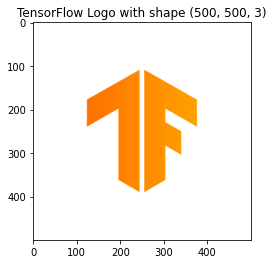

In [5]:
img_raw = tf.io.read_file(img_path)
img = tf.io.decode_image(img_raw)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [500,500])

plt.title("TensorFlow Logo with shape {}".format(img.shape))
_ = plt.imshow(img)

### 흑백 버전 만들기

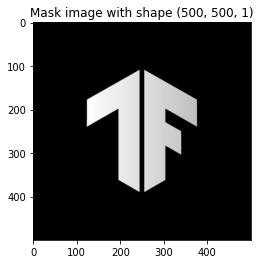

In [6]:
bw_img = 1.0 - tf.image.rgb_to_grayscale(img)

plt.title("Mask image with shape {}".format(bw_img.shape))
_ = plt.imshow(bw_img[...,0], cmap='gray')

# tfa.image 다루기

## Mean filtering

평균 필터링은 이미지 또는 신호에서 노이즈를 제거하는 데 자주 사용되는 필터링 기술입니다. 이미지를 픽셀 단위로 실행하고 인접 픽셀의 평균값으로 대체하는 것입니다.

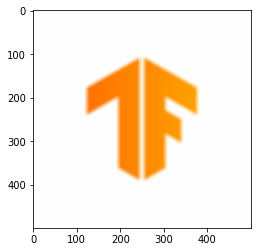

In [7]:
mean = tfa.image.mean_filter2d(img, filter_shape=11)
_ = plt.imshow(mean)

## Rotate

이 연산은 사용자가 입력한 각도(라디안)로 주어진 이미지를 회전합니다. 

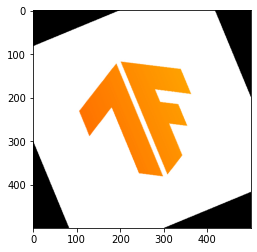

In [8]:
rotate = tfa.image.rotate(img, tf.constant(np.pi/8))
_ = plt.imshow(rotate)

## Transform

이 연산은 사용자가 제공한 변환 벡터를 기반으로 주어진 이미지를 변환합니다. 

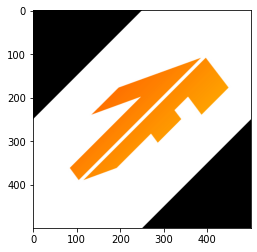

In [9]:
transform = tfa.image.transform(img, [1.0, 1.0, -250, 0.0, 1.0, 0.0, 0.0, 0.0])
_ = plt.imshow(transform)

## Random HSV in YIQ

이 연산은 주어진 RGB 이미지의 색상 스케일을 YIQ로 변경하지만, 여기에서 델타 색조 및 채도 값은 주어진 범위에서 무작위로 선택됩니다.

/tmpfs/src/tf_docs_env/lib/python3.6/site-packages/tensorflow_addons/utils/resource_loader.py:103: UserWarning: You are currently using TensorFlow 2.3.1 and trying to load a custom op (custom_ops/image/_distort_image_ops.so).
TensorFlow Addons has compiled its custom ops against TensorFlow 2.2.0, and there are no compatibility guarantees between the two versions. 
This means that you might get segfaults when loading the custom op, or other kind of low-level errors.
 If you do, do not file an issue on Github. This is a known limitation.

It might help you to fallback to pure Python ops with TF_ADDONS_PY_OPS . To do that, see https://github.com/tensorflow/addons#gpucpu-custom-ops 

You can also change the TensorFlow version installed on your system. You would need a TensorFlow version equal to or above 2.2.0 and strictly below 2.3.0.
 Note that nightly versions of TensorFlow, as well as non-pip TensorFlow like `conda install tensorflow` or compiled from source are not supported.

The las

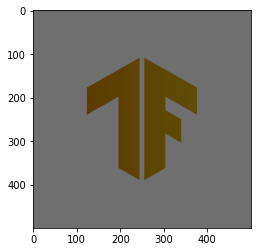

In [10]:
delta = 0.5
lower_saturation = 0.1
upper_saturation = 0.9
lower_value = 0.2
upper_value = 0.8
rand_hsvinyiq = tfa.image.random_hsv_in_yiq(img, delta, lower_saturation, upper_saturation, lower_value, upper_value)
_ = plt.imshow(rand_hsvinyiq)

## Adjust HSV in YIQ

이 연산은 주어진 RGB 이미지의 색상 스케일을 YIQ로 변경하지만, 여기에서는 임의로 선택하는 대신 델타 색조 및 채도 값이 사용자로부터 입력됩니다.

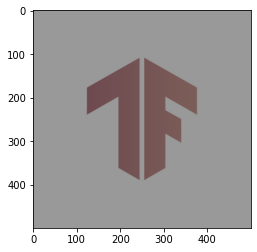

In [11]:
delta = 0.5
saturation = 0.3
value = 0.6
adj_hsvinyiq = tfa.image.adjust_hsv_in_yiq(img, delta, saturation, value)
_ = plt.imshow(adj_hsvinyiq)

## Dense Image Warp

이 연산은 오프셋 벡터의 flow 필드에서 지정된 이미지의 비선형 왜곡을 위한 것입니다(여기에서는 예를 들어, 임의의 값 사용). 

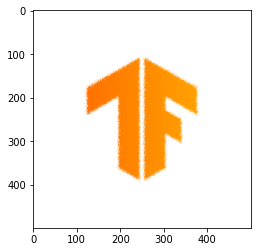

In [12]:
input_img = tf.image.convert_image_dtype(tf.expand_dims(img, 0), tf.dtypes.float32)

flow_shape = [1, input_img.shape[1], input_img.shape[2], 2]
init_flows = np.float32(np.random.normal(size=flow_shape) * 2.0)
dense_img_warp = tfa.image.dense_image_warp(input_img, init_flows)
dense_img_warp = tf.squeeze(dense_img_warp, 0)
_ = plt.imshow(dense_img_warp)

## Euclidian Distance Transform

이 연산은 전경 픽셀에서 배경 픽셀까지의 유클리드 거리로 픽셀값을 업데이트합니다.

- 참고: 이진 이미지만 취하여 이미지로 변환됩니다. 다른 이미지가 주어지면 단일 값을 가진 이미지로 변환됩니다.

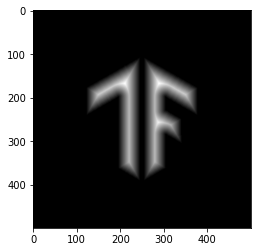

In [13]:
gray = tf.image.convert_image_dtype(bw_img,tf.uint8)
# The op expects a batch of images, so add a batch dimension
gray = tf.expand_dims(gray, 0)
eucid = tfa.image.euclidean_dist_transform(gray)
eucid = tf.squeeze(eucid, (0, -1))
_ = plt.imshow(eucid, cmap='gray')